# MuJoCo Basics

<a target="_blank" href="https://colab.research.google.com/github/CLAIR-LAB-TECHNION/AIR/blob/main/tutorials-2025/Tut02-mujoco_basics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

**Before you start, change to GPU runtime, so rendering cells will run faster.** To do that go to Runtime->Change runtime type->choose T4 GPU and save.
If at some point you get an error that you are out of your GPU quota, you can go back to cpu runtime, some cells will just run slower.

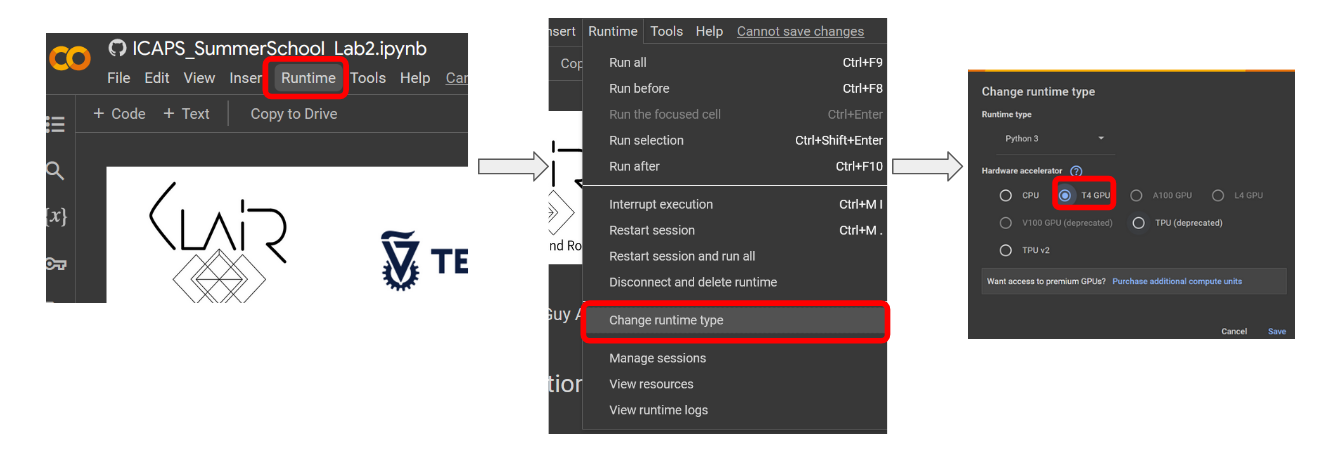

## MuJoCo in AIR

In this course, we will be using the [MuJoCo](https://mujoco.org/) physics engine for simulating robotic systems. This notebook provides a brief introduction to MuJoCo to familiarize you with the features required to complete the assignments in this course.

### What is MuJoCo?

![MuJoCo Banner](https://github.com/google-deepmind/mujoco/raw/main/banner.png)

MuJoCo is an open-source physics engine maintained by [Google DeepMind](https://deepmind.google). From the official [GitHub repository](https://github.com/google-deepmind/mujoco):
> **MuJoCo** stands for **Mu**lti-**Jo**int dynamics with **Co**ntact. It is a general purpose physics engine that aims to facilitate research and development in robotics, biomechanics, graphics and animation, machine learning, and other areas which demand fast and accurate simulation of articulated structures interacting with their environment.

MuJoCo can simulate a wide variety of robotic systems, including:
- Rigid body dynamics
- Soft body dynamics
- Collision detection
- Contact dynamics
- Actuation
- Sensors
- and much more...

<div style="text-align: center;">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBc5fXLUeFaaC4y3nfXhWBJTMlCofABLX_oQ&s" alt="MuJoCo Ant environments" height="200">
    <!-- <img src="https://www.researchgate.net/publication/380974441/figure/fig2/AS:11431281248015547@1717039136251/MuJoCo-humanoid-from-dm-control-package-in-MuJoCo-simulator.png" alt="MuJoCo Humanoid" height="200"> -->
    <img src="https://dl.acm.org/cms/attachment/html/10.1145/3674746.3674762/assets/html/images/image3.png" alt="MuJoCo UR5" height="200">
    <img src="https://media.licdn.com/dms/image/v2/D4E12AQHZoHgshp1vjA/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1662635328196?e=1761782400&v=beta&t=AFNg3obmKWQQsoF_JCzEo-m9qv8C-ZtVjHfSNg7_3BU" alt="MuJoCo robots" height="200">
</div>

### Why MuJoCo?

There are many popular physics engines available, such as [PyBullet](https://pybullet.org/), [ODE](https://www.ode.org/) (powering [WeBots](https://cyberbotics.com)), [DART](https://dartsim.github.io/) (powering [Gazebo](https://gazebosim.org/)), and [PhysX](https://developer.nvidia.com/physx-sdk) (powering [Isaac Sim](https://developer.nvidia.com/isaac/sim)). However, MuJoCo has several advantages that make it particularly well-suited for robotics research and applications:
- **Speed**: MuJoCo is designed to be fast and efficient, making it suitable for real-time applications and large-scale simulations. Runs efficiently on CPU, but also supports GPU acceleration using [MuJoCo XLA](https://mujoco.readthedocs.io/en/stable/mjx.html).
- **Accuracy**: MuJoCo uses advanced numerical methods to ensure accurate simulation of complex dynamics.
- **Flexibility**: MuJoCo supports a wide range of robotic systems and can be easily customized to fit specific needs.
- **Cross-Platform**: MuJoCo is available on multiple platforms, including Windows, macOS, and Linux.
- **Python Bindings**: While MuJoCo is written in C for performance, it provides Python bindings, making it easy to integrate with popular machine learning libraries such as TensorFlow and PyTorch.
- **Simple Setup**: MuJoCo is lightweight and easy to set up and use, with a straightforward API and extensive documentation. It can be fully installed using `pip install mujoco` with no additional actions required.
- **Community and Support**: MuJoCo has a large and active community of users and developers due to its popularity and open-source nature, providing a wealth of resources, tutorials, and support.

MuJoCo is an industry-standard physics engine widely used in academia and industry for robotics research and applications. Learning to competently use MuJoCo will be a valuable skill for anyone interested in robotics.

<img src="https://arxiv.org/html/2407.08590v1/x1.png" alt="Engines Compare" width="400" style="display: block; margin: 0 auto;">

### How will we use MuJoCo?

Throughout this course, MuJoCo will serve as the primary simulation environment for hands-on tutorials and assignments. We will:
- Create and render 3D worlds with robotic agents and various objects.
- Simulate the physics of these worlds, including dynamics, collisions, and contacts.
- Access the internal state of the simulation, including positions, velocities, and forces.
- Use sensors to gather information and provide feedback to the decision-making algorithms.
- Run decision-making algorithms to animate the robots and achieve specific tasks.

Thanks to its python support and easy setup, MuJoCo can be easily integrated into Jupyter notebooks (like this one), allowing us to run simulations and visualize results directly within our learning environment. This also means we can use [Google Colab](https://colab.research.google.com/) as our runtime environment, asserting that everyone is running in an identical same environment with access to free GPU resources. **This will enable us to focus on learning robotics concepts and algorithms without getting bogged down in complex installation or configuration processes.**

## Installation

### Insatlling MuJoCo

As promised, installing MuJoCo is very straightforward. You can install it using pip:

In [ ]:
!pip install mujoco

### GPU Rendering in Colab

Though this is enough to start running MuJoCo on CPU, we will enable GPU support to accelerate rendering in Colab. The following code ensures that our rendering engine OpenGL can detect and use the GPU.

In [2]:
import os
import subprocess
from sys import stderr

try:
  is_gpu = not bool(subprocess.run('nvidia-smi').returncode)
except FileNotFoundError as e:
  is_gpu = False
if is_gpu:
  # Add an ICD config so that glvnd can pick up the Nvidia EGL driver.
  # This is usually installed as part of an Nvidia driver package, but the Colab
  # kernel doesn't install its driver via APT, and as a result the ICD is missing.
  # (https://github.com/NVIDIA/libglvnd/blob/master/src/EGL/icd_enumeration.md)
  NVIDIA_ICD_CONFIG_PATH = '/usr/share/glvnd/egl_vendor.d/10_nvidia.json'
  if not os.path.exists(NVIDIA_ICD_CONFIG_PATH):
    with open(NVIDIA_ICD_CONFIG_PATH, 'w') as f:
      f.write("""{
      "file_format_version" : "1.0.0",
      "ICD" : {
          "library_path" : "libEGL_nvidia.so.0"
      }
  }
  """)
else:
  print(
    'Cannot communicate with GPU.\n'
    'Make sure you are using a GPU Colab runtime.\n'
    'Go to the Runtime menu and select Choose runtime type.\n'
    'You can also skip this and use CPU with slower rendering.',
    file=stderr)

Cannot communicate with GPU.
Make sure you are using a GPU Colab runtime.
Go to the Runtime menu and select Choose runtime type.
You can also skip this and use CPU with slower rendering.


### OpenGL Rendering Backend

The following line sets OpenGL as the rendering backend for MuJoCo. **SKIP THIS CELL IF RUNNING ON APPLE SILICON**.

In [3]:
import platform

is_apple_silicon = platform.system() == "Darwin" and platform.processor() == "arm"
if not is_apple_silicon:
  # On Apple Silicon, we need to set the following env variable to use the
  # correct OpenGL backend.
  %env MUJOCO_GL=egl

### Video Utilities

Finally, we install utilities for video recording and display.

In [ ]:
!command -v ffmpeg >/dev/null || (apt update && apt install -y ffmpeg)
!pip install mediapy

### Hello World

Run the code below to verify that everything is working correctly. You should see a completely black image rendered below.

""

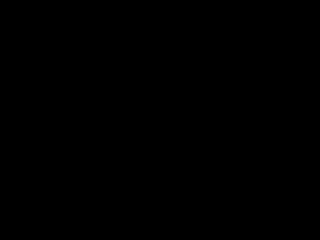

In [5]:
import mediapy as media
import mujoco

xml = "<mujoco></mujoco>"
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)

with mujoco.Renderer(model) as renderer:
    mujoco.mj_forward(model, data)
    renderer.update_scene(data)

    media.show_image(renderer.render())

## MJCF - MuJoCo XML Format

To describe scenes in MuJoCo, we use the MuJoCo XML format (MJCF). An `.mjcf` file is an XML file using specific tags to define the physical properties and structure of our simulation environment, including:
- Bodies (rigid bodies, joints, actuators)
- Geometries (shapes, sizes, materials)
- Sensors (cameras, force sensors)
- Other simulation parameters (gravity, time step resolution, etc.)

Throughout this course, you will not be required to write MJCF files from scratch. However, you must understand them so you may easily access the elements of a MuJoCo simulation and modify them as needed. Below is a simple example of an MJCF file that defines a basic scene with a ground plane and a table.

""

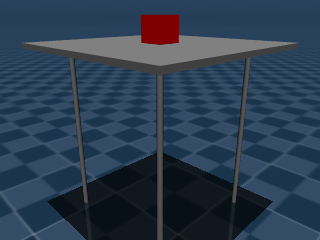

In [ ]:
def render_mjcf_string(mjcf_string: str, camera=-1):
    model = mujoco.MjModel.from_xml_string(mjcf_string)
    data = mujoco.MjData(model)

    with mujoco.Renderer(model) as renderer:
        mujoco.mj_forward(model, data)
        renderer.update_scene(data, camera=camera)

        media.show_image(renderer.render())

xml = """
<mujoco model="tableworld">
    <statistic center="0.3 0 0.4" extent="0.8"/>

    <visual>
        <headlight diffuse="0.6 0.6 0.6" ambient="0.1 0.1 0.1" specular="0 0 0"/>
        <rgba haze="0.15 0.25 0.35 1"/>
        <global azimuth="45" elevation="-20"/>
    </visual>

    <asset>
        <texture type="skybox" builtin="gradient" rgb1="0.3 0.5 0.7" rgb2="0 0 0" width="512" height="3072"/>
        <texture type="2d" name="groundplane" builtin="checker" mark="edge" rgb1="0.2 0.3 0.4" rgb2="0.1 0.2 0.3"
                 markrgb="0.8 0.8 0.8" width="300" height="300"/>
        <material name="groundplane" texture="groundplane" texuniform="true" texrepeat="5 5" reflectance="0.2"/>
    </asset>

    <worldbody>
        <light pos="0 0 1.5" dir="0 0 -1" directional="true"/>
        <geom name="floor" pos="0.0 0.0 0.0" size="0 0 0.05" type="plane" material="groundplane"/>

        <body name="table" pos="0.3 0.0 0">
            <geom name="table_top" type="box" size=".37 .37 .01" pos="0 0 .7"/>
            <geom name="table_leg_1" type="cylinder" size=".01 .7" pos=".24 -.24 -.0" euler="0 0 0"/>
            <geom name="table_leg_2" type="cylinder" size=".01 .7" pos=".24 .24 -.0" euler="0 0 0"/>
            <geom name="table_leg_3" type="cylinder" size=".01 .7" pos="-.24 -.24 -.0" euler="0 0 0"/>
            <geom name="table_leg_4" type="cylinder" size=".01 .7" pos="-.24 .24 -.0" euler="0 0 0"/>
        </body>

        <body name="red_box" pos="0.3 0 0.76" quat="0. 0. 1. 0.">
            <freejoint/>
            <geom type="box" size=".05 .05 .05" rgba="1 0 0 1"/>
        </body>

        <!--angle view-->
        <camera name="rightangleview" pos="2.182 1.724 2.590" xyaxes="-0.685 0.729 0.000 -0.456 -0.429 0.780"/>
        <camera name="leftangleview" pos="2.182 -1.724 2.590" xyaxes="0.685 0.729 0.000 -0.456 0.429 0.780"/>
        <!-- front view -->
        <camera mode="fixed" name="frontview" pos="2.5 0 1.45" quat="0.56 0.43 0.43 0.56"/>
        <!-- bird view -->
        <camera mode="fixed" name="birdview" pos="0.3 0 3.0" quat="0.7071 0 0 0.7071"/>
        <!-- side view -->
        <camera mode="fixed" name="leftsideview" pos="0.151 -2.941 0.9" xyaxes="1.000 0.000 0.000 0.000 0.000 1.000"/>
        <camera mode="fixed" name="rightsideview" pos="0.151 2.941 0.9" xyaxes="-1.000 0.000 0.000 0.000 0.000 1.000"/>


    </worldbody>

</mujoco>
"""

render_mjcf_string(xml)

So what's going on here? Let's break it down:
- The `<mujoco>` tag is the root element of the MJCF file, containing all other elements. It is the only required tag in an MJCF file.
- The `<worldbody>` tag is the root body of the simulation, defining the global coordinate system and containing all other bodies and geometries.
- The `<geom>` tags define geometric shapes in the simulation. There is exactly one geometric shape directly under `<worldbody>`, which is the ground plane.
- The `<body>` tags define rigid bodies in the simulation that are nested in the `<worldbody>`. Each body can have its own position, orientation, and other properties. This simulation has two bodies:
  - table - defined by its top surface and four legs. The top is a thin, square-shaped box geometry positioned above four thin cylindrical legs. Note that the positions of all bodies and geometries are defined relative to their parent body. For example, the table body position is defined relative to the world coordinate system, while the table-top and legs are defined relative to the table body.
  - red_box - a small red box positioned on top of the table.
- The `<freejoint/>` tag defines the connection between the `red_box` body and the world. `<freejoint/>` is a special case of `<joint>` of type `free`, meaning it has 6 degrees of freedom (3 translational and 3 rotational). The `table` body, which does not define any joint connection to the world, is fixed in place and cannot move or rotate in the simulation.
- The `<camera>` tag defines a camera in the simulation. This is an invisible point in space that can be used to render images from a specific viewpoint. In this case, we set up six cameras each looking at the table.

For full MJCF documentation, please refer to the [MuJoCo XML reference](https://mujoco.readthedocs.io/en/stable/XMLreference.html). This reference describes all the available tags and attributes in MJCF.

## The Model and Data Objects

An instantiated MuJoCo simulation consists of two main objects: `model` the `data`. The `model` object contains all the static information about the simulation, such as the physical properties of bodies, geometries, joints, and actuators. The `data` object contains all the dynamic information about the simulation, such as the current state of bodies, velocities, forces, and sensor readings.

### MjModel

The model object `mujoco.MjModel` can be viewed as an instantiation of an MJCF scene. Let's take our MJCF from above and load it into a MuJoCo simulation.

In [7]:
model = mujoco.MjModel.from_xml_string(xml)
model

Using this model object, we can access various properties of the simulation. For example, we can see how many `geom` elements are in the simulation.

In [8]:
model.ngeom

7

We can use the model object to access the properties of the `geom` elements. For example, we can get the positions of all the `geom` elements in the simulation as a numpy array.

In [9]:
model.geom_pos

array([[ 0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.7 ],
       [ 0.24, -0.24, -0.  ],
       [ 0.24,  0.24, -0.  ],
       [-0.24, -0.24, -0.  ],
       [-0.24,  0.24, -0.  ],
       [ 0.  ,  0.  ,  0.  ]])

You can access many more properties of the model object. Use autocomplete to explore available options.

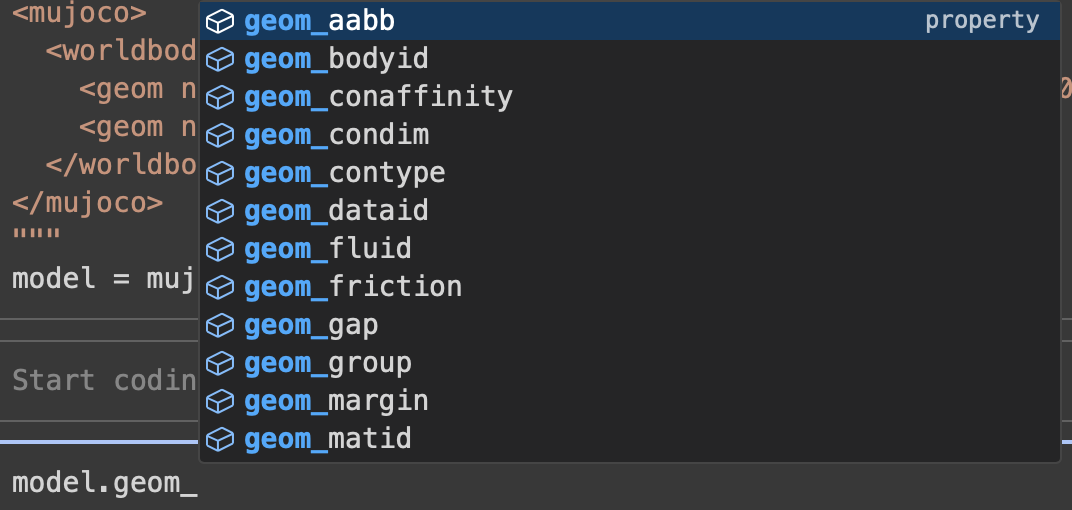

For a full list of properties, please refer to the [MuJoCo Model API](https://mujoco.readthedocs.io/en/stable/APIreference/APItypes.html#mjmodel).

Let's change the color of the red box to blue by modifying the `rgba` property of the corresponding geom. It is the last `geom` element in the XML file, so we can access it using the index `-1`.

""

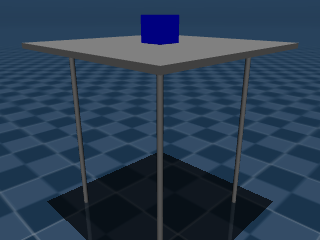

In [10]:
def render_model(model: mujoco.MjModel, camera=-1):
    data = mujoco.MjData(model)
    with mujoco.Renderer(model) as renderer:
        mujoco.mj_forward(model, data)
        renderer.update_scene(data, camera=camera)

        media.show_image(renderer.render())

model.geom_rgba[-1] = [0, 0, 1, 1]  # Change red box to blue
render_model(model)


Voila! The box is now blue.

### MjData

We can view the data object as the current state of the simulation. It contains all the variables that change during simulation, such as joint positions, velocities, forces, and sensor readings. To create a data object, we initialize it with the model object:

In [11]:
data = mujoco.MjData(model)
data

We have hitherto only rendered the initial state of the simulation. With the data object, we can now run the simulation forward in time using the `mujoco.mj_step` function. This function updates the data object in place, advancing the simulation by one time step. Let's run the simulation for 1 second (simulation time) and render it in 60 FPS.

In [12]:
duration = 1 # (seconds)
framerate = 60  # (Hz)

# Simulate and display video.
frames = []
mujoco.mj_resetData(model, data)  # Reset state and time.
with mujoco.Renderer(model) as renderer:
  while data.time < duration:
    
    # Step the simulation forward by one time step
    # after this line is executed, data contains the new state of the simulation
    mujoco.mj_step(model, data)

    if len(frames) < data.time * framerate:
      renderer.update_scene(data)
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=framerate)  # stitch frames into video and display

Unsurprisingly, nothing happens since the simulation is in a steady state. With the data object, we can dynamically alter and also monitor the state of the simulation. For example, let's give the red box an initial upward velocity by modifying the `qvel` property of the data object. The `qvel` array contains the velocities of all the joints in the model, in this case, the box's free joint. Since our model has only one joint (the free joint of the box), we know the only degrees of freedom we are affecting are those of the box. We will also monitor the center of mass (COM) position of the box during the simulation by printing the `xpos` property of the data object. The `xpos` array contains the positions of all the bodies in the model, and like before, we know that the last entry corresponds to the box.

As with the model, there are many properties in the data object that we can modify or monitor. For a full list of properties, please refer to the [MuJoCo Data API](https://mujoco.readthedocs.io/en/stable/APIreference/APItypes.html#mjdata).

In [13]:
duration = 1  # (seconds)
framerate = 60  # (Hz)

mujoco.mj_resetData(model, data)  # Reset state and time.

RED_BOX_IDX = -1

# print xpos of the red box. 
print('box initial position:', data.xpos[RED_BOX_IDX])

# Give the box an initial upward velocity
data.qvel[2] = 1.5

# Simulate and display video.
frames = []
with mujoco.Renderer(model) as renderer:
  while data.time < duration:
    mujoco.mj_step(model, data)


    print(f'box position at frame {len(frames)}:', data.xpos[RED_BOX_IDX])

    if len(frames) < data.time * framerate:
      renderer.update_scene(data)
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=framerate)

box initial position: [0. 0. 0.]
box position at frame 0: [0.3  0.   0.76]
box position at frame 1: [0.3        0.         0.76296076]
box position at frame 1: [0.3        0.         0.76588228]
box position at frame 1: [0.3        0.         0.76876456]
box position at frame 1: [0.3       0.        0.7716076]
box position at frame 1: [0.3       0.        0.7744114]
box position at frame 1: [0.3        0.         0.77717596]
box position at frame 1: [0.3        0.         0.77990128]
box position at frame 1: [0.3        0.         0.78258736]
box position at frame 2: [0.3       0.        0.7852342]
box position at frame 2: [0.3       0.        0.7878418]
box position at frame 2: [0.3        0.         0.79041016]
box position at frame 2: [0.3        0.         0.79293928]
box position at frame 2: [0.3        0.         0.79542916]
box position at frame 2: [0.3       0.        0.7978798]
box position at frame 2: [0.3       0.        0.8002912]
box position at frame 2: [0.3        0.    

And just like that, We made a box that can jump!

## Named Access

Both the model and data objects support named access to their elements, which can make the code more readable and easier to maintain. Instead of using numerical indices to access elements in arrays, we can use the names defined in the XML model. The name matches the `name` attribute of each element in the XML. For example, to access the body element corresponding to the red box, we can use its name "red_box" instead of the index `-1`, like so:

In [14]:
red_box_body = model.body("red_box")
red_box_body

<_MjModelBodyViews
  dofadr: array([0], dtype=int32)
  dofnum: array([6], dtype=int32)
  geomadr: array([6], dtype=int32)
  geomnum: array([1], dtype=int32)
  id: 2
  inertia: array([0.00166667, 0.00166667, 0.00166667])
  invweight0: array([  1., 600.])
  ipos: array([0., 0., 0.])
  iquat: array([1., 0., 0., 0.])
  jntadr: array([0], dtype=int32)
  jntnum: array([1], dtype=int32)
  mass: array([1.])
  mocapid: array([-1], dtype=int32)
  name: 'red_box'
  parentid: array([0], dtype=int32)
  pos: array([0.3 , 0.  , 0.76])
  quat: array([0., 0., 1., 0.])
  rootid: array([2], dtype=int32)
  sameframe: array([1], dtype=uint8)
  simple: array([1], dtype=uint8)
  subtreemass: array([1.])
  user: array([], dtype=float64)
  weldid: array([2], dtype=int32)
>

From the above properties, we can see that there is exactly 1 `geom` element in this body and that its address is `6`. This way, even though the inner geom is not named, we can still access it through the body name. Let's make it wider:

""

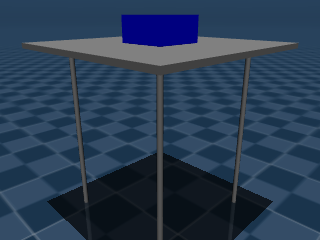

In [15]:
model.geom_size[red_box_body.geomadr[0]] = [0.1, 0.1, 0.05]  # Change red box to purple
render_model(model)

Similarly, we can access and modify a geom directly by its name. Let's make the table-top green:

""

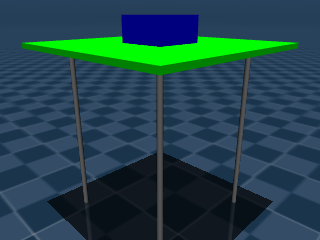

In [16]:
table_top_geom = model.geom("table_top")
table_top_geom.rgba = [0, 1, 0, 1]  # Change table-top to green

render_model(model)

We can do the same with the data object. For example, let's apply a constant force on the red box body in the positive direction of the x-axis:

In [17]:
duration = 1  # (seconds)
framerate = 60  # (Hz)

mujoco.mj_resetData(model, data)  # Reset state and time.

# Apply upward force of 5N to red_box
red_box_state = data.body("red_box")
red_box_state.xfrc_applied[1] = -11

# Simulate and display video.
frames = []
with mujoco.Renderer(model) as renderer:
  while data.time < duration:
    mujoco.mj_step(model, data)

    # reuse the named access to get the red box position
    print(f'box position at frame {len(frames)}:', red_box_state.xpos)

    if len(frames) < data.time * framerate:
      renderer.update_scene(data)
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=framerate)

box position at frame 0: [0.3  0.   0.76]
box position at frame 1: [ 3.0000000e-01 -4.4000000e-05  7.5996076e-01]
box position at frame 1: [ 3.00000000e-01 -8.64693431e-05  7.59931620e-01]
box position at frame 1: [ 3.00000000e-01 -1.27952263e-04  7.59910838e-01]
box position at frame 1: [ 3.00000000e-01 -1.68854405e-04  7.59896968e-01]
box position at frame 1: [ 3.00000000e-01 -2.09474101e-04  7.59888810e-01]
box position at frame 1: [ 3.00000000e-01 -2.50077888e-04  7.59885428e-01]
box position at frame 1: [ 3.00000000e-01 -2.91120272e-04  7.59886367e-01]
box position at frame 1: [ 3.00000000e-01 -3.32976015e-04  7.59891252e-01]
box position at frame 2: [ 3.00000000e-01 -3.75955276e-04  7.59899774e-01]
box position at frame 2: [ 3.00000000e-01 -4.20315804e-04  7.59911675e-01]
box position at frame 2: [ 3.00000000e-01 -4.66272765e-04  7.59926740e-01]
box position at frame 2: [ 3.00000000e-01 -5.14006658e-04  7.59944787e-01]
box position at frame 2: [ 3.00000000e-01 -5.81229963e-04  7.

As you can see, named access can make the code more intuitive and easier to understand. It also makes the code more robust to changes in the model structure, as we don't have to worry about updating numerical indices if the model changes.

One last trick: if you want to list all the names of a certain element type in the model, you can call try to access an invalid name and the error message will contain all valid names. For example, to list all geom names:

In [18]:
try:
    model.geom()
except KeyError as e:
    print(e)

"Invalid name ''. Valid names: ['floor', 'table_leg_1', 'table_leg_2', 'table_leg_3', 'table_leg_4', 'table_top']"


## Robots in MuJoCo

### Adding a Robot to the Scene



Robots are often modeled using Universal Robot Description Format (URDF) files. Although MuJoCo can load URDF files directly, we will use the [Mujoco Menagerie](https://github.com/google-deepmind/mujoco_menagerie) which is a freely available repository that contains a collection of robot models in MJCF format, ready to be used in MuJoCo simulations. Let's load a UR5e robot from the Mujoco Menagerie and place it in our scene.

First, we need to download the menagerie repository:

In [19]:
!git clone https://github.com/google-deepmind/mujoco_menagerie
(robot_path,) = !find mujoco_menagerie -name "ur5e.xml"
print(f"UR5e robot MJCF path: {robot_path}")

fatal: destination path 'mujoco_menagerie' already exists and is not an empty directory.
UR5e robot MJCF path: mujoco_menagerie/universal_robots_ur5e/ur5e.xml


Next, we need to load the scene and robot MJCF files as `MjSpec` objects, which allows us to easily modify the XML structure.

In [20]:
scene_spec = mujoco.MjSpec.from_string(xml)
robot_spec = mujoco.MjSpec.from_file(robot_path)

Each spec object can be compiled into a model object:

""

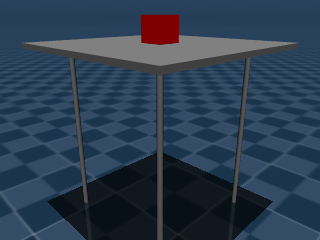

""

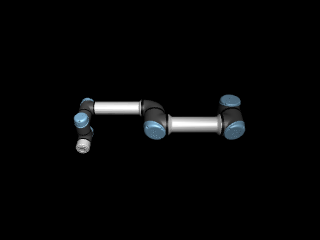

In [21]:
scene_model = scene_spec.compile()
render_model(scene_model)

robot_model = robot_spec.compile()
render_model(robot_model)

To add the robot to the scene, we first add a mounting site to the scene spec, then attach the robot spec to that site. The new spec compiles into the joint model that we wanted:

In [22]:
# create a mount (body + site) in the parent where the robot should attach
mount = scene_spec.worldbody.add_body(name="mount", pos=[0.0, 0.0, 0.72], xyaxes=[-1, 0, 0, 0, -1, 0])
mount_site = mount.add_site(name="mount_site", pos=[0, 0, 0])

# attach the entire robot spec to the parent's mount site (prefix renames attached elements)
scene_spec.attach(robot_spec, site=mount_site, )

# compile into a model and data
model = scene_spec.compile()

Let's render from a different camera angle to see the robot better:

""

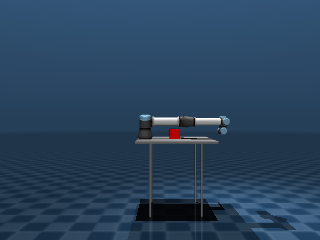

In [23]:
render_model(model, camera="leftsideview")

### Controlling the Robot

Our UR5e robot has 6 revolute joints. We can access the joint positions through the `qpos` property of the data object.

In [24]:
data = mujoco.MjData(model)
data.qpos

array([0.3 , 0.  , 0.76, 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  ])

In our scene, `qpos` contains 13 values. The first 7 correspond to the red box's free joint (3 for position, 4 for orientation as a quaternion), and the last 6 correspond to the UR5e's revolute joints. Let's change the UR5e's joint angles so that the arm is pointing straight up:

""

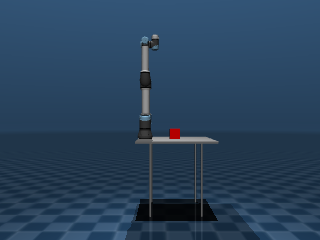

In [25]:
from math import pi
data.qpos[7:] = [0, -pi/2, 0, 0, pi/2, 0]

with mujoco.Renderer(model) as renderer:
    mujoco.mj_forward(model, data)
    renderer.update_scene(data, camera="leftsideview")

    media.show_image(renderer.render())

In [26]:
data.site('attachment_site').xpos

array([0.1  , 0.134, 1.8  ])

The joints are actuated by position servos. This means we can control the robot by specifying the desired joint angles. We can set the actuation targets through the `ctrl` property of the data object. The `ctrl` array contains the target values for all actuators in the model, in this case, the 6 revolute joints of the UR5e. Let's make the arm point straight up again, but this time using the `ctrl` property:

In [27]:
data = mujoco.MjData(model)

# set controls to make the arm point straight up
data.ctrl[:] = [0, -pi/2, 0, 0, pi/2, 0]

duration = 1  # (seconds)
framerate = 60  # (Hz)

# Simulate and display video.
frames = []
with mujoco.Renderer(model) as renderer:
  while data.time < duration:
    mujoco.mj_step(model, data)

    if len(frames) < data.time * framerate:
      renderer.update_scene(data, camera="leftsideview")
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=framerate)

In the above example, we use a constant control signal. In practice, we often want to change the control signal over time. We can do this by updating the `ctrl` property in each simulation step. Let's make the arm wave back and forth by applying a sinusoidal control signal to the first joint:

In [28]:
import numpy as np

# Create new data object for the combined model
data = mujoco.MjData(model)

# Define a simple waving motion for the robot arm
duration = 3.0  # seconds
framerate = 60  # Hz

# Reset the simulation
mujoco.mj_resetData(model, data)

# Set initial robot configuration (home position)
wave_home_qpos = [0, -pi/2, pi/2, -pi/2, -pi/2, 0]  # radians
wave_freq = 2.0  # Hz

# Create a waving motion by oscillating the shoulder and elbow joints
frames = []
with mujoco.Renderer(model) as renderer:
    while data.time < duration:
        # Calculate waving motion
        t = data.time
        
        # Modify shoulder lift and elbow joints for waving
        shoulder_lift_offset = 0.5 * np.sin(2 * np.pi * wave_freq * t)
        elbow_offset = 0.8 * np.sin(2 * np.pi * wave_freq * t + np.pi/4)
        
        # Set the control targets (for position servos)
        data.ctrl[0] = wave_home_qpos[0]  # shoulder pan - keep still
        data.ctrl[1] = wave_home_qpos[1] + shoulder_lift_offset  # shoulder lift - wave
        data.ctrl[2] = wave_home_qpos[2] + elbow_offset  # elbow - wave
        data.ctrl[3] = wave_home_qpos[3]  # wrist 1 - keep still
        data.ctrl[4] = wave_home_qpos[4]  # wrist 2 - keep still
        data.ctrl[5] = wave_home_qpos[5]  # wrist 3 - keep still
        
        # Step the simulation
        mujoco.mj_step(model, data)
        
        # Render at specified framerate
        if len(frames) < data.time * framerate:
            renderer.update_scene(data, camera="leftsideview")
            pixels = renderer.render()
            frames.append(pixels)

media.show_video(frames, fps=framerate)

## Conclusion

In this tutorial you learned the basics of MuJoCo. You learned how to define a scene in MuJoCo using MJCF XML files, how to create and manipulate the simulation model and state objects, and how to control robot movements using joint angles and actuator commands. There is much more to learn about MuJoCo. If you wish to expand your knowledge on the basics of MuJoCo and how to construct simulations, I suggest starting with the official MuJoCo [getting started tutorial](https://colab.research.google.com/github/google-deepmind/mujoco/blob/main/python/tutorial.ipynb) and their [model editing tutorial](https://colab.research.google.com/github/google-deepmind/mujoco/blob/main/python/mjspec.ipynb).

In the next tutorial, you will get your hands dirty by implementing hard-coded control policies to solve specific tasks.